# MNIST 손글씨 - 일반 Neural Network

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
#층을 담는 그릇(Sequential은 keras에 포함되어 있는데
# 딥러닝 모델을 한층 한층 쌓기 쉽게 해주는 함수)
from tensorflow.keras.layers import Dense
#층을 만드는 것(각 층이 가질 특성을 각각 다르게 지정 가능) 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
# seed값 생성
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

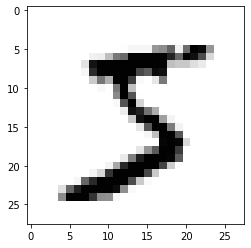

In [6]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [7]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write(f'{i:3d}')
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [8]:
# 0~1 사이의 값으로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# 3차원 데이터를  2차원으로 (데이터는 2차원을 1차원으로)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1,784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
# 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## 모델 정의, 설정, 실행

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # 모델 최고값 저장

In [15]:
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 48)                24624     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                490       
Total params: 427,034
Trainable params: 427,034
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
# 모델 최적화를 위한 설정
modelpath = 'model/best_mnist_dnn.h5'
checkpoint = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)
earlystopping = EarlyStopping(patience=10)

In [20]:
history =model.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs=50, batch_size=200, verbose = 0,
    callbacks=[checkpoint, earlystopping])   # 트레인셋의 일부를 떼서 시험(split)


Epoch 00001: val_loss improved from inf to 0.17246, saving model to model\best_mnist_dnn.h5

Epoch 00002: val_loss improved from 0.17246 to 0.11588, saving model to model\best_mnist_dnn.h5

Epoch 00003: val_loss improved from 0.11588 to 0.09664, saving model to model\best_mnist_dnn.h5

Epoch 00004: val_loss improved from 0.09664 to 0.08474, saving model to model\best_mnist_dnn.h5

Epoch 00005: val_loss improved from 0.08474 to 0.08035, saving model to model\best_mnist_dnn.h5

Epoch 00006: val_loss did not improve from 0.08035

Epoch 00007: val_loss improved from 0.08035 to 0.07779, saving model to model\best_mnist_dnn.h5

Epoch 00008: val_loss did not improve from 0.07779

Epoch 00009: val_loss did not improve from 0.07779

Epoch 00010: val_loss did not improve from 0.07779

Epoch 00011: val_loss did not improve from 0.07779

Epoch 00012: val_loss did not improve from 0.07779

Epoch 00013: val_loss did not improve from 0.07779

Epoch 00014: val_loss did not improve from 0.07779

Epoch

In [21]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9796


[0.06827908009290695, 0.9796000123023987]

# 학습과정 시각화

In [22]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

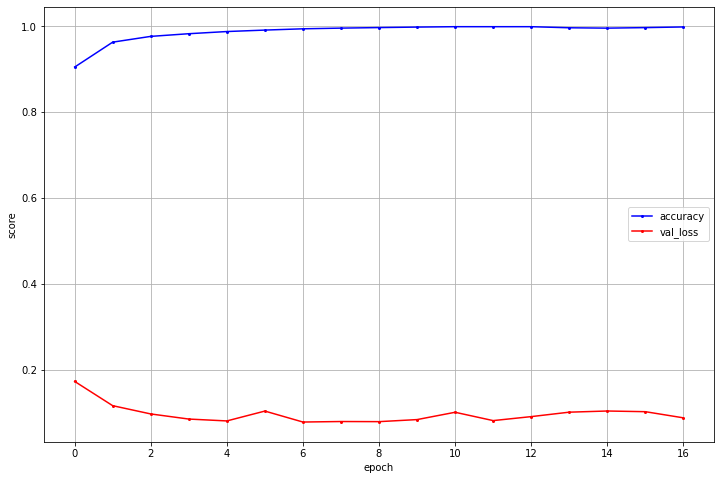

In [23]:
plt.figure(figsize=(12,8))

# 학습셋 정확도 라인
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')

# 태스트셋 오차 라인
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')

plt.legend(loc='best')   #location  right, left, upper rigtht 등등 
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('score')

plt.show()